In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1 = pd.read_csv('corona_tested_individuals.csv')



c:\users\prathish\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df1=df1.drop(['test_date',],axis=1)

In [3]:
df1.isna().sum()

cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [4]:
df1 = df1.loc[:, df1.isna().sum()/len(df1) < 0.95]

In [5]:
df1.dtypes


cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

In [6]:
l_col = list(df1.columns)
for i in l_col:
    df1[i].replace({np.nan:999},inplace = True)

In [7]:
df1.isna().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [8]:
df1.dtypes

cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

In [9]:
X = df1.drop(['corona_result','test_indication'],axis=1)

In [10]:
X = pd.get_dummies(X,drop_first=True)
X

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above_No,age_60_and_above_Yes,gender_female,gender_male
0,0,0,0,0,0,1,0,0,1
1,0,1,0,0,0,1,0,0,1
2,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,1,0,0,1
4,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
2742591,0,0,0,0,0,0,0,1,0
2742592,0,0,0,0,0,0,0,1,0
2742593,0,0,0,0,0,0,0,0,1
2742594,0,0,0,0,0,0,0,1,0


In [11]:
y = df1['corona_result']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [13]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred_df= classifier.predict(X_test)

In [15]:
print("Decision Tree Accuracy:",accuracy_score(y_test, y_pred_df))

Decision Tree Accuracy: 0.919324630307774


[[734742      0   9205]
 [ 11794      0    672]
 [ 44707      0  21659]]


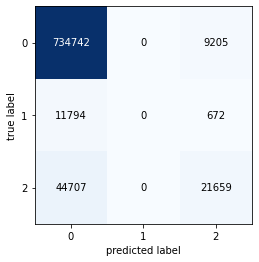

In [16]:
cm = confusion_matrix(y_test,y_pred_df)
print(cm)
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
plot_confusion_matrix(cm)
plt.show()

In [17]:
from sklearn.metrics import classification_report

In [18]:
target_names = ['class 0','class 1']
print(classification_report(y_test, y_pred_df))

c:\users\prathish\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\prathish\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.93      0.99      0.96    743947
       other       0.00      0.00      0.00     12466
    positive       0.69      0.33      0.44     66366

    accuracy                           0.92    822779
   macro avg       0.54      0.44      0.47    822779
weighted avg       0.90      0.92      0.90    822779



c:\users\prathish\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
import os
from sklearn import tree
# Creating a Tree graph
dotfile = open("dtree.dot", 'w')
tree.export_graphviz(classifier, out_file = dotfile, feature_names = X.columns, filled=True)
dotfile.close()

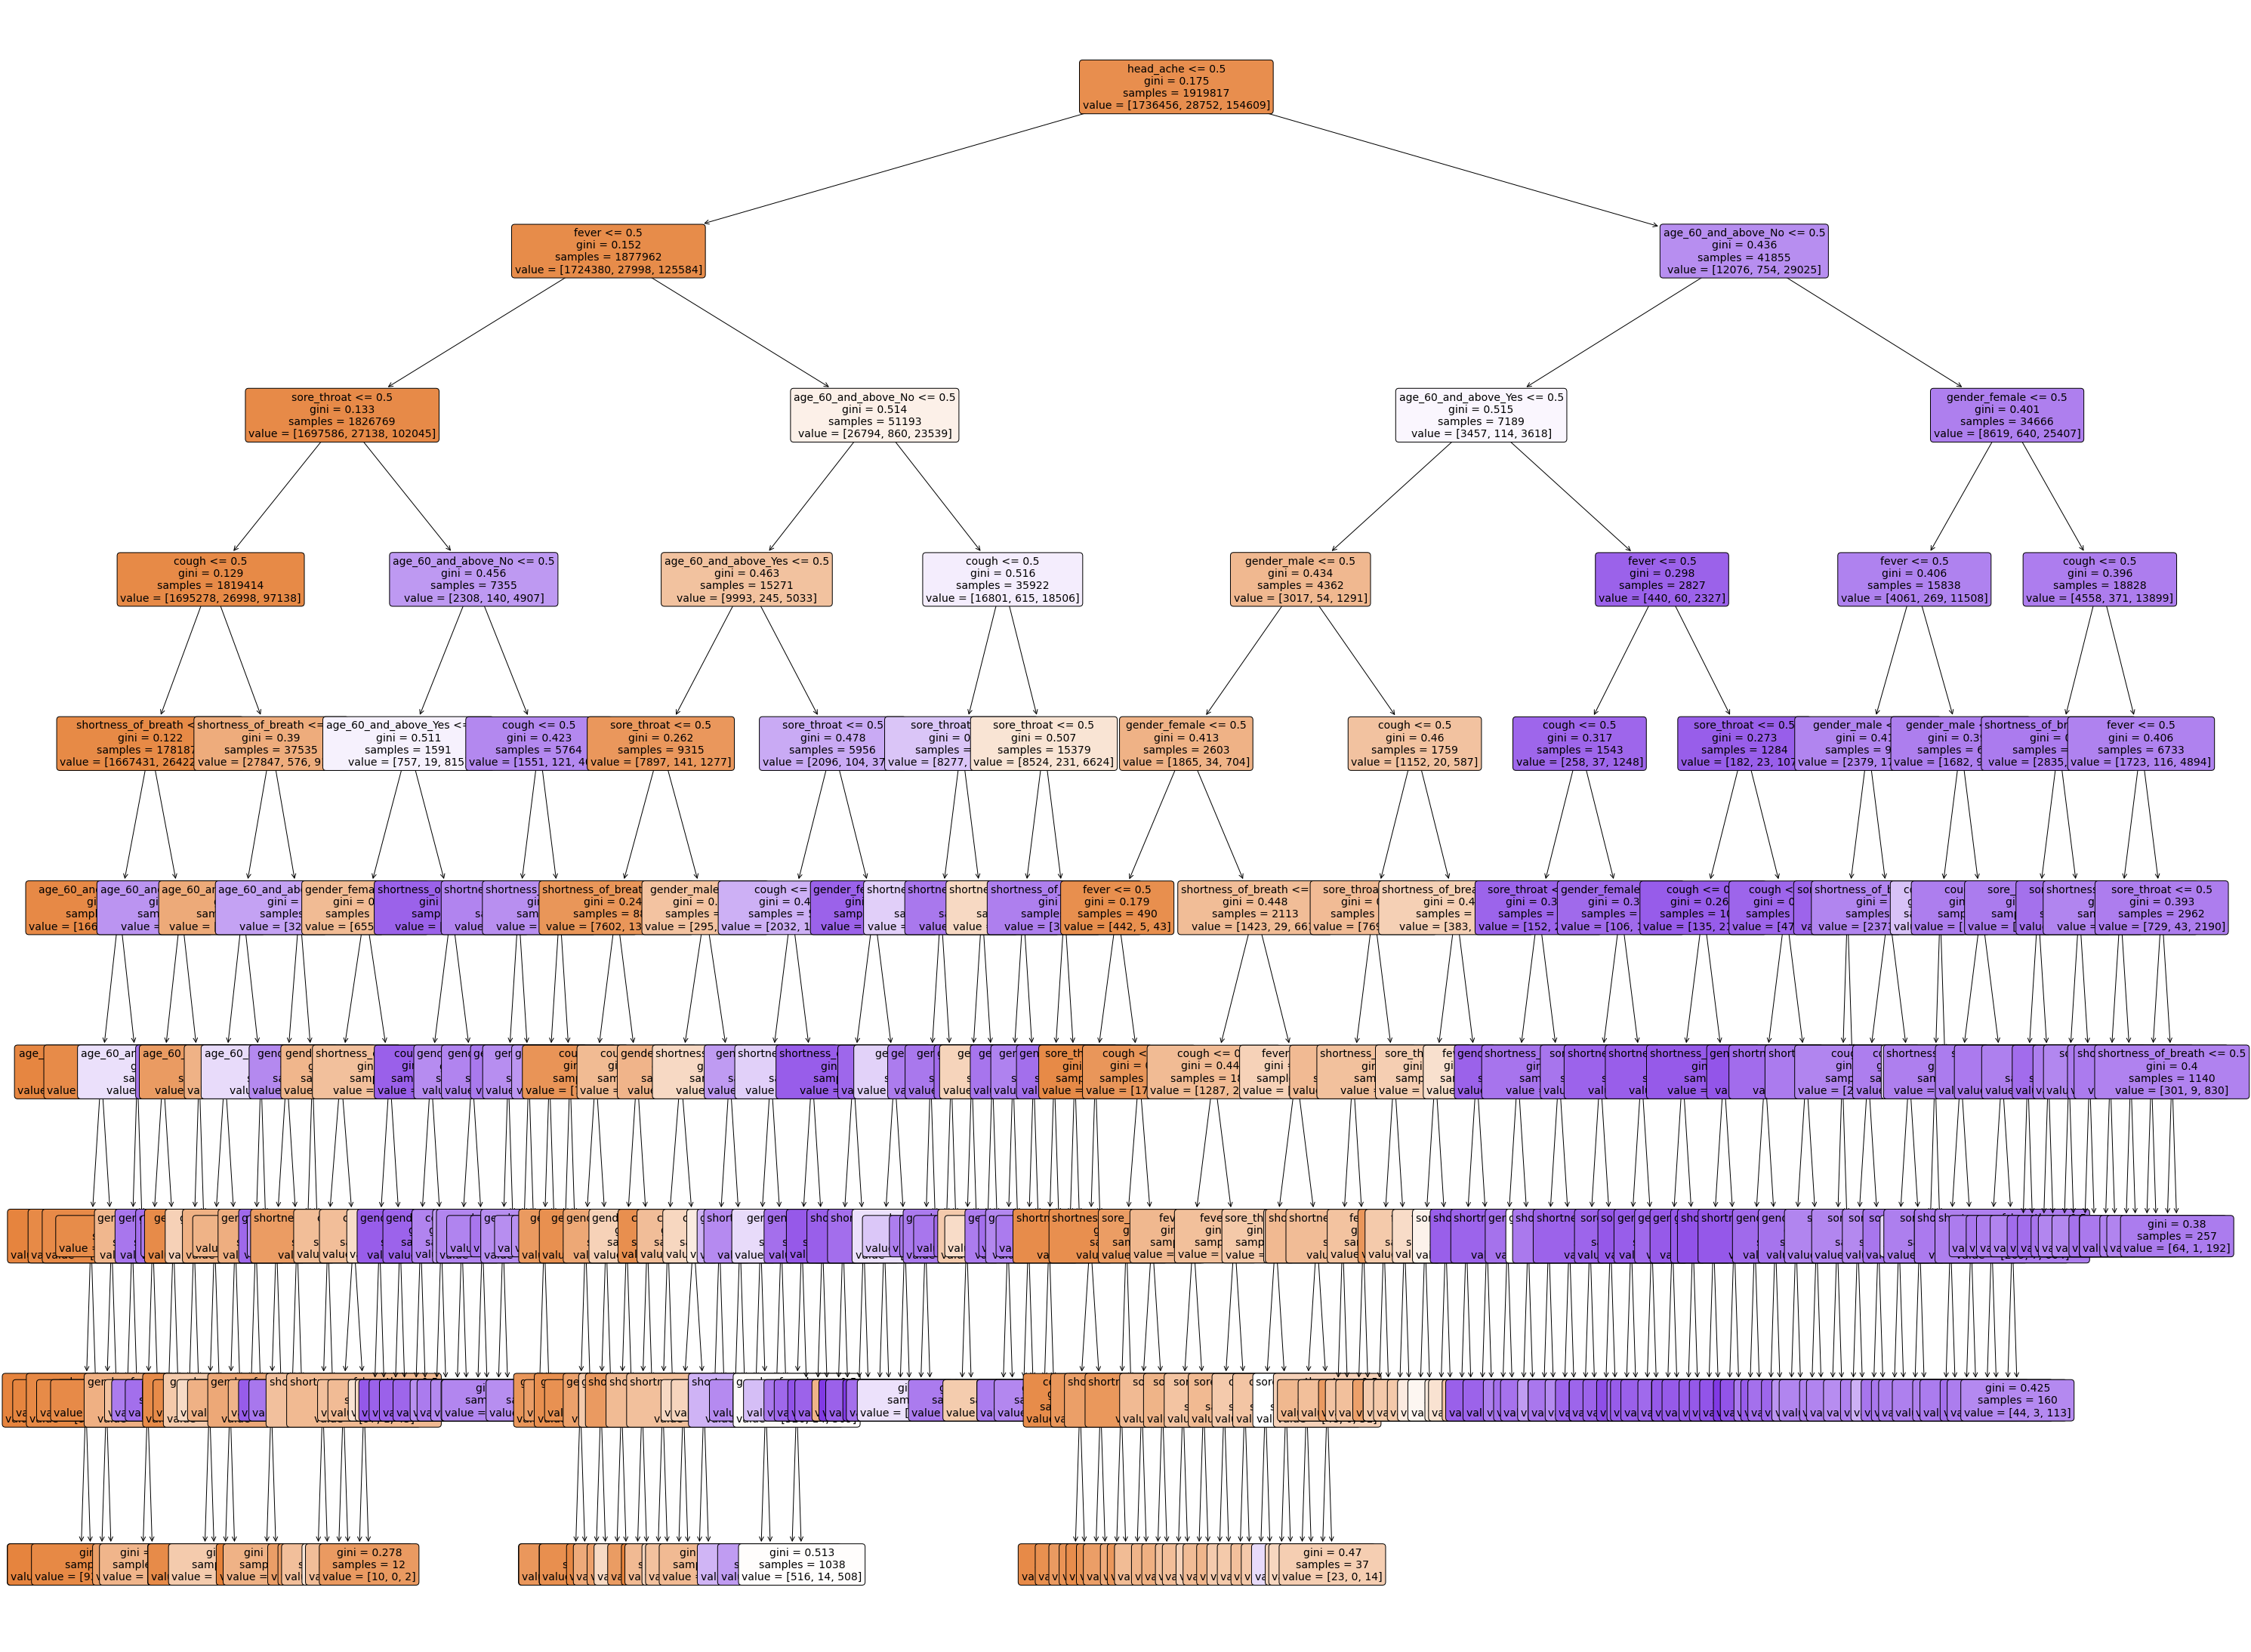

In [20]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,40))
a = plot_tree(classifier, 
              feature_names=X.columns, 
               
              filled=True, 
              rounded=True, 
              fontsize=14)